In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("HR-Employee-Attrition.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [3]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
data.shape

(1470, 35)

In [5]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
data.drop('EmployeeCount',axis = 1, inplace = True)
data.drop('StandardHours',axis = 1, inplace = True)
data.drop('EmployeeNumber',axis = 1, inplace = True)

In [8]:
data['EAT'] = data['Education'] / (data['Age'] + data['TotalWorkingYears'])
data['YCM-YC'] = data['YearsWithCurrManager'] / (data['YearsAtCompany'] + 1)
data['YCR-YWC'] = data['YearsInCurrentRole'] / (data['YearsWithCurrManager'] + 1)

In [9]:
data.shape

(1470, 35)

In [10]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EAT', 'YCM-YC', 'YCR-YWC'],
      dtype='object')

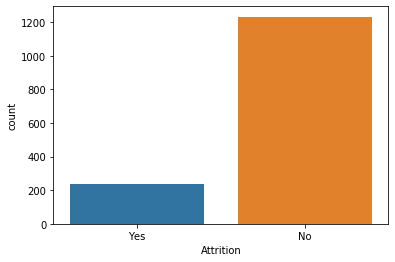

In [11]:
sns.countplot(x= data['Attrition'])

In [12]:
print(data['Attrition'].value_counts())
print(data['Attrition'].value_counts(normalize = True))

No     1233
Yes     237
Name: Attrition, dtype: int64
No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64


Observation: 
1. There is an imbalance in the attrition class data. A dummy model which always predicts "Attrition = No" is 83.87% accurate

In [13]:
#Let us analyze the effect of poor pay in the Employee Attrition
print(data['DailyRate'].max())
print(data['DailyRate'].min())
print(data['DailyRate'].mean())
print(data['DailyRate'].std())

1499
102
802.4857142857143
403.50909994352827


In [14]:
print(data[data.Attrition == 'Yes']['DailyRate'].max())
print(data[data.Attrition == 'Yes']['DailyRate'].min())
print(data[data.Attrition == 'Yes']['DailyRate'].mean())
print(data[data.Attrition == 'Yes']['DailyRate'].std())

1496
103
750.3628691983122
401.89951940778354


In [15]:
print(data[data.Attrition == 'No']['DailyRate'].max())
print(data[data.Attrition == 'No']['DailyRate'].min())
print(data[data.Attrition == 'No']['DailyRate'].mean())
print(data[data.Attrition == 'No']['DailyRate'].std())

1499
102
812.5044606650446
403.2083790501569


Observation : 
1. Mean and standard Deviation of 'DailyRate' is similar for both the Attrition classes 'Yes' and 'No'.
2. Because of which it can be concluded that 'DailyRate' has very less effect on Attrition.

In [16]:
#Let us analyse the age group which is leaving the company
#Here the age is divided into groups of '18-25', '26-30','31-40','41-50','51-60'
print(data['Age'].max())
print(data['Age'].min())

60
18


In [17]:
temp1 = pd.cut(data['Age'], bins = [18,26,31,41,51,61], labels = ['18-25', '26-30','31-40','41-50','51-60'])

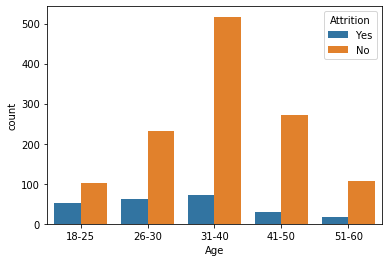

In [18]:
sns.countplot(x= temp1 , hue = data['Attrition'])

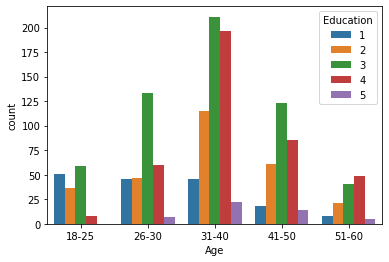

In [19]:
sns.countplot(x= temp1 , hue = data['Education'])

Observation:
1. Attrition percentage is more in the age group 18-25, followed by 26-30, 51-60, 41-50, 31-40
2. The possible reason of more Attrition in the 18-25 age range is the education level is either 1,2 or 3. Possibility is the employee might look for higher education oppurtunities.

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Attrition in NT: 0.08
Attrition in TF: 0.2490974729241877
Attrition in TR: 0.14956855225311602


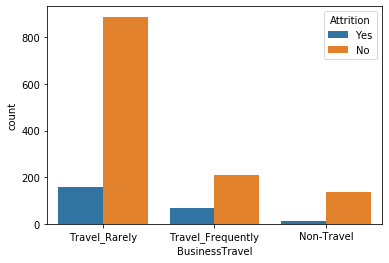

In [20]:
#Attrition vs BusinessTravel
sns.countplot(x= data['BusinessTravel'], hue = data['Attrition'] )
BT = data.BusinessTravel.value_counts()
print(BT)

Attrit_NT = data[data.BusinessTravel == 'Non-Travel'][data.Attrition == 'Yes']
Att_NT= Attrit_NT['BusinessTravel'].value_counts()
Attr_NT_Per = Att_NT/BT[2]
print('Attrition in NT:', Attr_NT_Per[0])

Attrit_TF = data[data.BusinessTravel == 'Travel_Frequently'][data.Attrition == 'Yes']
Att_TF= Attrit_TF['BusinessTravel'].value_counts()
Attr_TF_Per = Att_TF/BT[1]
print('Attrition in TF:',Attr_TF_Per[0])

Attrit_TR = data[data.BusinessTravel == 'Travel_Rarely'][data.Attrition == 'Yes']
Att_TR= Attrit_TR['BusinessTravel'].value_counts()
#print(Att_TR)
Attr_TR_Per = Att_TR/BT[0]
print('Attrition in TR:',Attr_TR_Per[0])

Observation:
1. Employees who travel frequently has higher percentage of Attrition.

Attrition in Sales Dept: 0.2062780269058296
Attrition in R & D Dept: 0.1383975026014568
Attrition in HR Dept: 0.19047619047619047


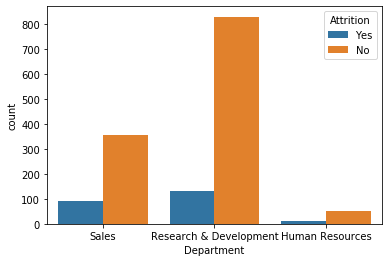

In [21]:
#Which Department has more Attrition?
sns.countplot(x= data['Department'], hue = data['Attrition'] )
Dept = data.Department.value_counts()

Attrit_Sales1 = data[data.Department == 'Sales'][data.Attrition == 'Yes']
Att_Sales= Attrit_Sales1['Department'].value_counts()
Attr_Sales_Per = Att_Sales/Dept['Sales']
print('Attrition in Sales Dept:',Attr_Sales_Per[0])

Attrit_RND1 = data[data.Department == 'Research & Development'][data.Attrition == 'Yes']
Att_RND= Attrit_RND1['Department'].value_counts()
Attr_RND_Per = Att_RND/Dept['Research & Development']
print('Attrition in R & D Dept:',Attr_RND_Per[0])

Attrit_HR1 = data[data.Department == 'Human Resources'][data.Attrition == 'Yes']
Att_HR= Attrit_HR1['Department'].value_counts()
Attr_HR_Per = Att_HR/Dept['Human Resources']
print('Attrition in HR Dept:',Attr_HR_Per[0])

Observation:
1. Attrition is more in the Sales Department followed by HR and R&D.

In [22]:
#Has 'YearsSinceLastPromotion' has any effect on Attrition?
print(data['YearsSinceLastPromotion'].max())
print(data['YearsSinceLastPromotion'].min())
temp = pd.cut(data['YearsSinceLastPromotion'], bins = [0,6,11,16], labels = ['0-5', '5-10','11-15'])

15
0


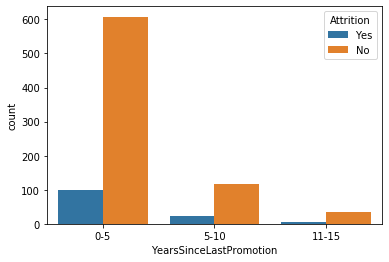

In [23]:
sns.countplot(x= temp , hue = data['Attrition'])

Observation:
1. YearsSinceLastPromotion does not have much effect on Attrition

In [24]:
#Has 'YearsWithCurrManager' has any effect on Attrition?
print(data['YearsWithCurrManager'].max())
print(data['YearsWithCurrManager'].min())

17
0


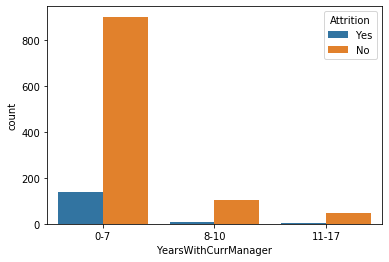

In [25]:
temp = pd.cut(data['YearsWithCurrManager'], bins = [0,8,11,18], labels = ['0-7', '8-10','11-17'])
sns.countplot(x= temp , hue = data['Attrition'])

Observation:
1. YearsWithCurrManager does not have much effect on Attrition

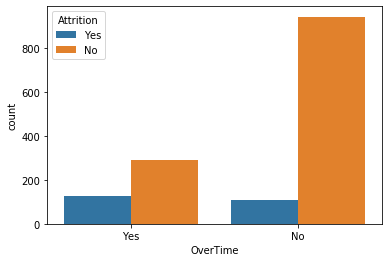

In [26]:
#Effect of OverTime on Attrition?
sns.countplot(x= data['OverTime'] , hue = data['Attrition'])

Observation:
1. Employees working OverTime in the office have more Attrition rate

In [27]:
#JobRole in each Department
for dpt in data['Department'].unique():
    print('\n', dpt,':')
    print(data[data.Department == dpt]['JobRole'].value_counts())


 Sales :
Sales Executive         326
Sales Representative     83
Manager                  37
Name: JobRole, dtype: int64

 Research & Development :
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Research Director             80
Manager                       54
Name: JobRole, dtype: int64

 Human Resources :
Human Resources    52
Manager            11
Name: JobRole, dtype: int64


In [28]:
#Categorical type columns and its classes
for col in data.select_dtypes(['object']).columns:
    print(col, ':', sorted(data[col].unique()))

Attrition : ['No', 'Yes']
BusinessTravel : ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']
Department : ['Human Resources', 'Research & Development', 'Sales']
EducationField : ['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree']
Gender : ['Female', 'Male']
JobRole : ['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative']
MaritalStatus : ['Divorced', 'Married', 'Single']
Over18 : ['Y']
OverTime : ['No', 'Yes']


In [29]:
data.drop('Over18',axis = 1, inplace = True) # has just one value

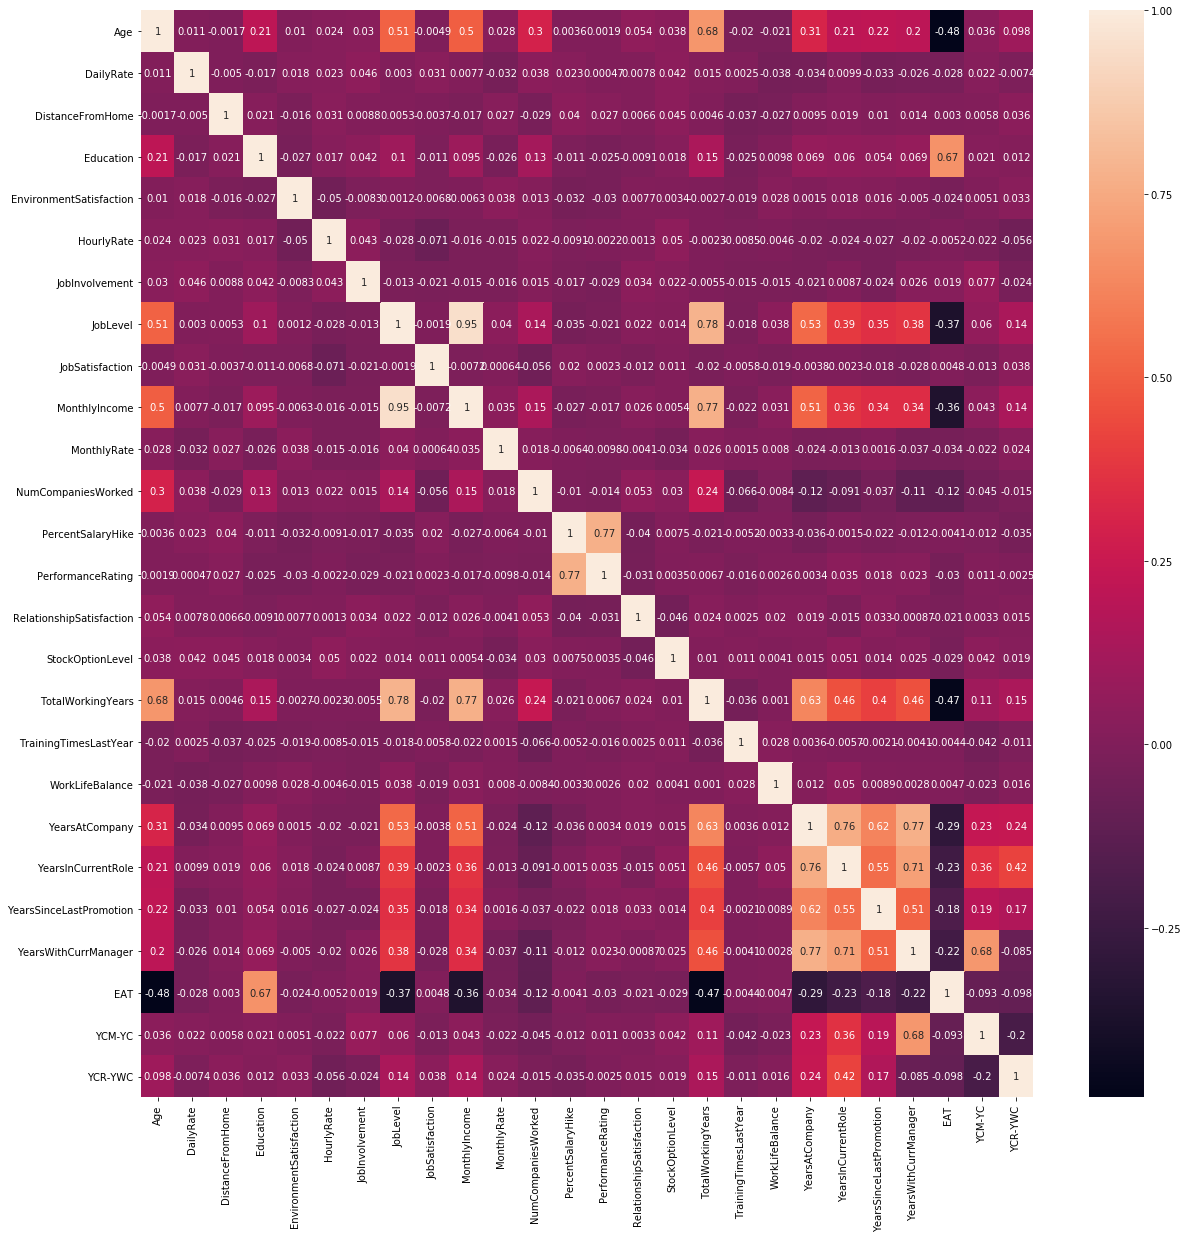

In [30]:
#Let us check the correlation matrix
corr_hmap = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_hmap,annot = True)
plt.show()

In [31]:
data.drop('Education',axis = 1, inplace = True)
data.drop('Age',axis = 1, inplace = True)
data.drop('TotalWorkingYears',axis = 1, inplace = True)
data.drop('YearsAtCompany',axis = 1, inplace = True)
data.drop('YearsInCurrentRole',axis = 1, inplace = True)
data.drop('YearsWithCurrManager',axis = 1, inplace = True)

In [32]:
data.drop('JobLevel',axis = 1, inplace = True)

In [33]:
data.drop('PercentSalaryHike',axis = 1, inplace = True)

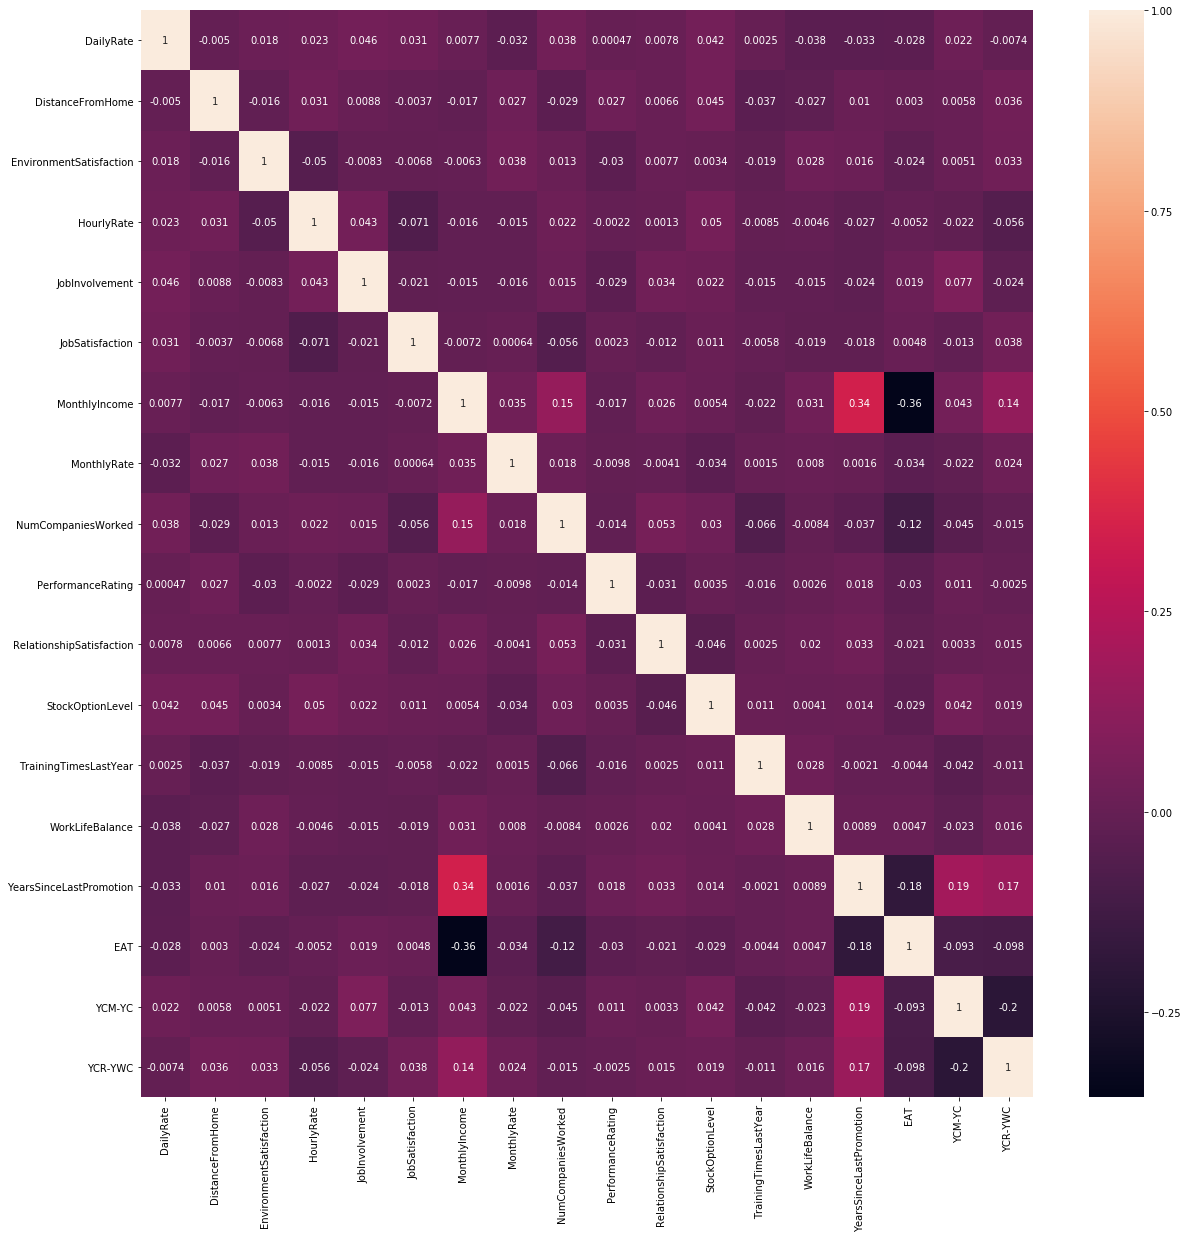

In [34]:
corr_hmap = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_hmap,annot = True)
plt.show()

In [35]:
# label encoding to clean up categorical data
categorical_data = {'Attrition': {'No':0, 'Yes':1}, 
    'BusinessTravel': {'Non-Travel':0, 'Travel_Frequently':1, 'Travel_Rarely':2}, 
    'Department': {'Human Resources':0, 'Research & Development':1, 'Sales':2}, 
    'EducationField': {'Human Resources':0, 'Life Sciences':1, 'Marketing':2, 'Medical':3, 'Technical Degree':4, 'Other':5}, 
    'Gender': {'Female':0, 'Male':1}, 
    'JobRole': {'Healthcare Representative':0, 'Human Resources':1, 'Laboratory Technician':2, 'Manager':3, 'Manufacturing Director':4, 'Research Director':5, 'Research Scientist':6, 'Sales Executive':7, 'Sales Representative':8}, 
    'MaritalStatus': {'Divorced':0, 'Single':1, 'Married':2}, 
    'OverTime': {'No':0, 'Yes':1}}

data = data.replace(categorical_data)
data

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,EAT,YCM-YC,YCR-YWC
0,1,2,1102,2,1,1,2,0,94,3,...,1,3,1,0,0,1,0,0.040816,0.714286,0.666667
1,0,1,279,1,8,1,3,1,61,2,...,0,4,4,1,3,3,1,0.016949,0.636364,0.875000
2,1,2,1373,1,2,5,4,1,92,2,...,1,3,2,0,3,3,0,0.045455,0.000000,0.000000
3,0,1,1392,1,3,1,4,0,56,3,...,1,3,3,0,3,3,3,0.097561,0.000000,7.000000
4,0,2,591,1,2,3,1,1,40,3,...,0,3,4,1,3,3,2,0.030303,0.666667,0.666667
5,0,1,1005,1,2,1,4,1,79,3,...,0,3,3,0,2,2,3,0.050000,0.750000,1.000000
6,0,2,1324,1,3,3,3,0,81,4,...,1,4,1,3,3,2,0,0.042254,0.000000,0.000000
7,0,2,1358,1,24,1,4,1,67,3,...,0,4,2,1,2,3,0,0.032258,0.000000,0.000000
8,0,1,216,1,23,1,4,1,44,2,...,0,4,2,0,2,3,1,0.062500,0.800000,0.777778
9,0,2,1299,1,27,3,3,1,94,3,...,0,3,2,2,3,2,7,0.056604,0.875000,0.875000


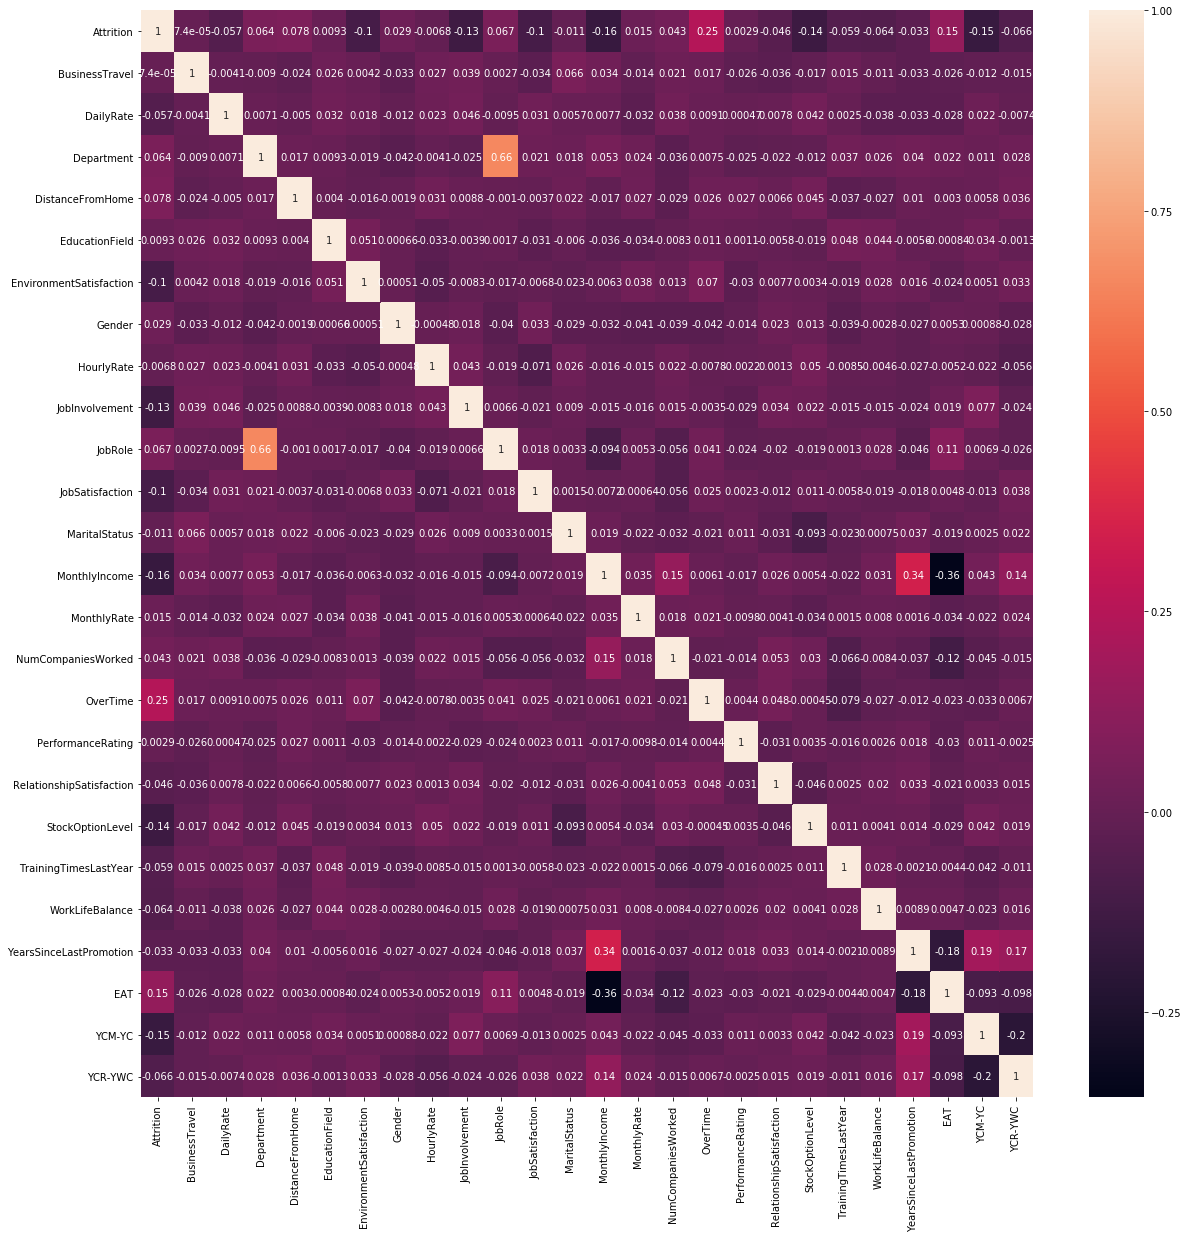

In [36]:
corr_hmap = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_hmap,annot = True)
plt.show()

In [37]:
data.drop('Department', axis = 1, inplace = True)

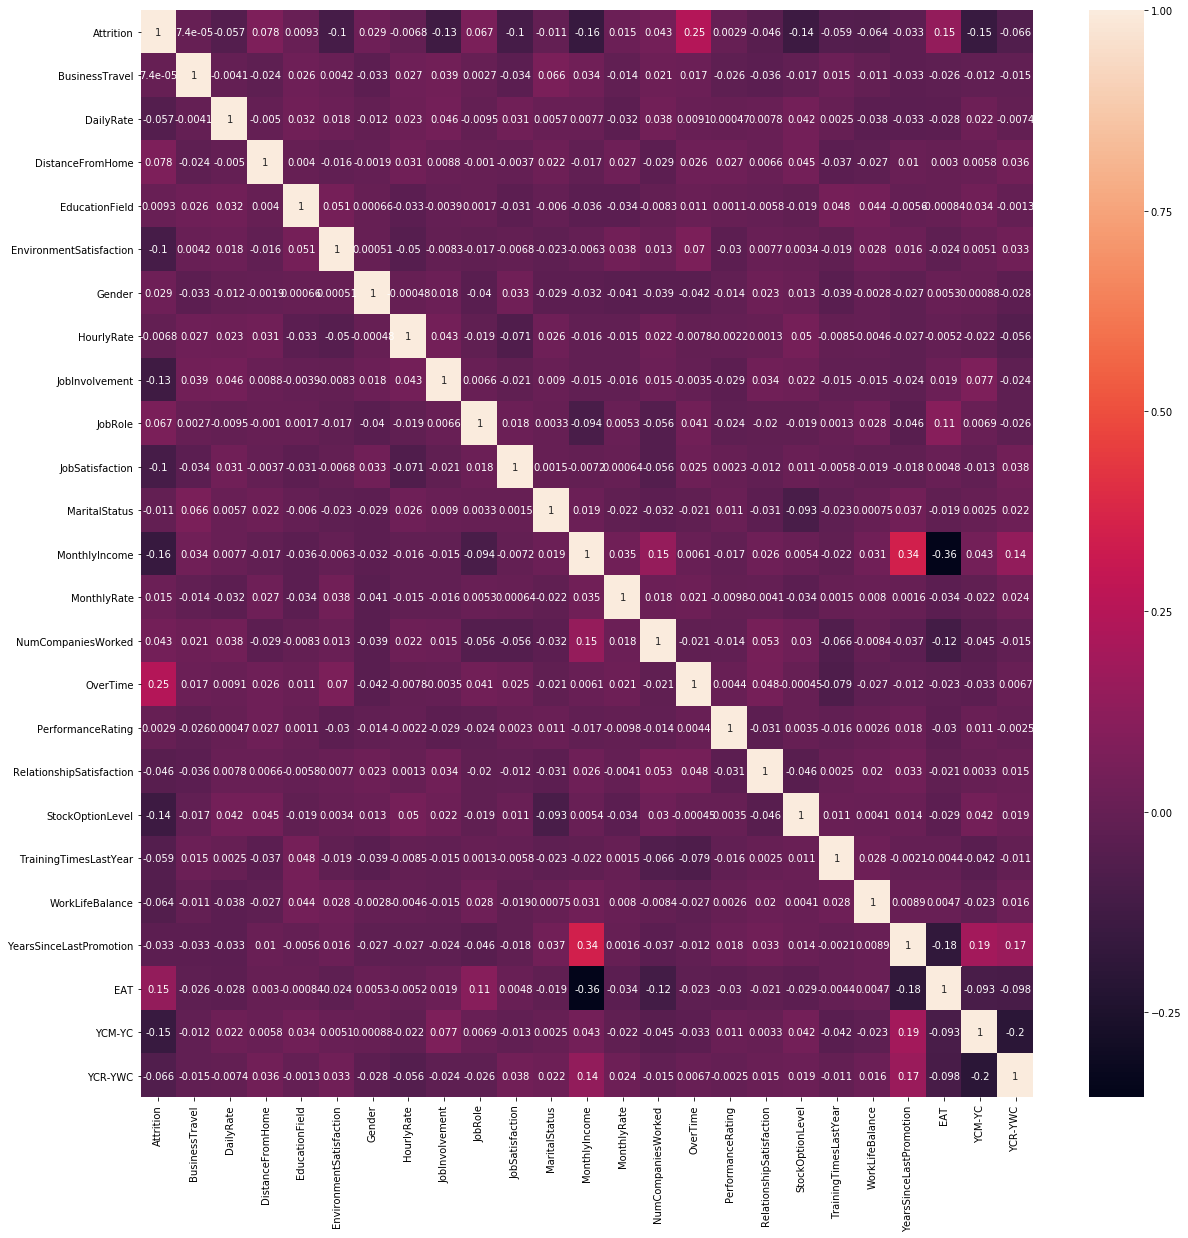

In [38]:
corr_hmap = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_hmap,annot = True)
plt.show()

In [39]:
data

,Attrition,BusinessTravel,DailyRate,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,...,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,EAT,YCM-YC,YCR-YWC
0,1,2,1102,1,1,2,0,94,3,7,...,1,3,1,0,0,1,0,0.040816,0.714286,0.666667
1,0,1,279,8,1,3,1,61,2,6,...,0,4,4,1,3,3,1,0.016949,0.636364,0.875000
2,1,2,1373,2,5,4,1,92,2,2,...,1,3,2,0,3,3,0,0.045455,0.000000,0.000000
3,0,1,1392,3,1,4,0,56,3,6,...,1,3,3,0,3,3,3,0.097561,0.000000,7.000000
4,0,2,591,2,3,1,1,40,3,2,...,0,3,4,1,3,3,2,0.030303,0.666667,0.666667
5,0,1,1005,2,1,4,1,79,3,2,...,0,3,3,0,2,2,3,0.050000,0.750000,1.000000
6,0,2,1324,3,3,3,0,81,4,2,...,1,4,1,3,3,2,0,0.042254,0.000000,0.000000
7,0,2,1358,24,1,4,1,67,3,2,...,0,4,2,1,2,3,0,0.032258,0.000000,0.000000
8,0,1,216,23,1,4,1,44,2,4,...,0,4,2,0,2,3,1,0.062500,0.800000,0.777778
9,0,2,1299,27,3,3,1,94,3,0,...,0,3,2,2,3,2,7,0.056604,0.875000,0.875000


In [40]:
data.columns

Index(['Attrition', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsSinceLastPromotion',
       'EAT', 'YCM-YC', 'YCR-YWC'],
      dtype='object')

In [41]:
data.shape

(1470, 25)

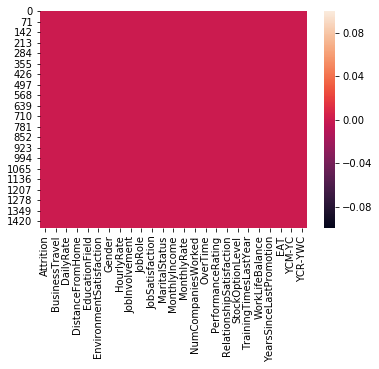

In [42]:
sns.heatmap(data.isnull()) #No NULL values

In [43]:
#Let us not drop any more columns. Only highly co-related columns are dropped now.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [44]:
y = data['Attrition']
print('Shape of y is:',y.shape)

x = data.drop("Attrition", axis = 1)
print('Shape of y is:',x.shape)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4, random_state = 42)

LR = LogisticRegression()
LR.fit(x_train,y_train)
print('Score:',LR.score(x_train,y_train))
predval = LR.predict(x_test)

print('Accuracy_score:', accuracy_score(y_test, predval))

print('Confusion Matrix:','\n',confusion_matrix(y_test,predval))

print('Classification Report:','\n', classification_report(y_test,predval))

Shape of y is: (1470,)
Shape of y is: (1470, 24)
Score: 0.8299319727891157
Accuracy_score: 0.8622448979591837
Confusion Matrix: 
 [[504   3]
 [ 78   3]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       507
           1       0.50      0.04      0.07        81

    accuracy                           0.86       588
   macro avg       0.68      0.52      0.50       588
weighted avg       0.82      0.86      0.81       588



In [45]:
y = data['Attrition']
print('Shape of y is:',y.shape)

x = data.drop("Attrition", axis = 1)
print('Shape of y is:',x.shape)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4, random_state = 42)

RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
print('Score:',RFC.score(x_train,y_train))
predval = RFC.predict(x_test)

print('Accuracy_score:', accuracy_score(y_test, predval))

print('Confusion Matrix:','\n',confusion_matrix(y_test,predval))

print('Classification Report:','\n', classification_report(y_test,predval))

Shape of y is: (1470,)
Shape of y is: (1470, 24)
Score: 0.9693877551020408
Accuracy_score: 0.8707482993197279
Confusion Matrix: 
 [[502   5]
 [ 71  10]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       507
           1       0.67      0.12      0.21        81

    accuracy                           0.87       588
   macro avg       0.77      0.56      0.57       588
weighted avg       0.85      0.87      0.83       588



In [46]:
#The recall value for Attrition is very low. So lets try to find the top features that is affecting Attrition in data
data.columns

Index(['Attrition', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsSinceLastPromotion',
       'EAT', 'YCM-YC', 'YCR-YWC'],
      dtype='object')

In [47]:
corr_hmap = data.corr()
corr_hmap

,Attrition,BusinessTravel,DailyRate,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,...,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,EAT,YCM-YC,YCR-YWC
Attrition,1.000000,0.000074,-0.056652,0.077924,0.009275,-0.103369,0.029453,-0.006846,-0.130016,0.067151,...,0.246118,0.002889,-0.045872,-0.137145,-0.059478,-0.063939,-0.033019,0.146285,-0.153259,-0.065513
BusinessTravel,0.000074,1.000000,-0.004086,-0.024469,0.025936,0.004174,-0.032981,0.026528,0.039062,0.002724,...,0.016543,-0.026341,-0.035986,-0.016727,0.015240,-0.011256,-0.032591,-0.025504,-0.012247,-0.015246
DailyRate,-0.056652,-0.004086,1.000000,-0.004985,0.031826,0.018355,-0.011716,0.023381,0.046135,-0.009472,...,0.009135,0.000473,0.007846,0.042143,0.002453,-0.037848,-0.033229,-0.028430,0.022307,-0.007418
DistanceFromHome,0.077924,-0.024469,-0.004985,1.000000,0.003997,-0.016075,-0.001851,0.031131,0.008783,-0.001015,...,0.025514,0.027110,0.006557,0.044872,-0.036942,-0.026556,0.010029,0.002982,0.005839,0.035992
EducationField,0.009275,0.025936,0.031826,0.003997,1.000000,0.050606,0.000655,-0.033111,-0.003910,0.001746,...,0.010855,0.001076,-0.005764,-0.019016,0.048156,0.043917,-0.005639,-0.000844,0.033608,-0.001285
EnvironmentSatisfaction,-0.103369,0.004174,0.018355,-0.016075,0.050606,1.000000,0.000508,-0.049857,-0.008278,-0.017321,...,0.070132,-0.029548,0.007665,0.003432,-0.019359,0.027627,0.016194,-0.024345,0.005075,0.032559
Gender,0.029453,-0.032981,-0.011716,-0.001851,0.000655,0.000508,1.000000,-0.000478,0.017960,-0.039723,...,-0.041924,-0.013859,0.022868,0.012716,-0.038787,-0.002753,-0.026985,0.005276,0.000882,-0.028404
HourlyRate,-0.006846,0.026528,0.023381,0.031131,-0.033111,-0.049857,-0.000478,1.000000,0.042861,-0.018861,...,-0.007782,-0.002172,0.001330,0.050263,-0.008548,-0.004607,-0.026716,-0.005183,-0.021930,-0.056440
JobInvolvement,-0.130016,0.039062,0.046135,0.008783,-0.003910,-0.008278,0.017960,0.042861,1.000000,0.006616,...,-0.003507,-0.029071,0.034297,0.021523,-0.015338,-0.014617,-0.024184,0.018971,0.077435,-0.024380
JobRole,0.067151,0.002724,-0.009472,-0.001015,0.001746,-0.017321,-0.039723,-0.018861,0.006616,1.000000,...,0.040662,-0.024233,-0.020218,-0.019171,0.001342,0.027764,-0.046384,0.108160,0.006879,-0.025948


In [48]:
corr_hmap['Attrition'].sort_values(ascending = False)

Attrition                   1.000000
OverTime                    0.246118
EAT                         0.146285
DistanceFromHome            0.077924
JobRole                     0.067151
NumCompaniesWorked          0.043494
Gender                      0.029453
MonthlyRate                 0.015170
EducationField              0.009275
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
MaritalStatus              -0.011195
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
YCR-YWC                    -0.065513
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
StockOptionLevel           -0.137145
YCM-YC                     -0.153259
MonthlyIncome              -0.159840
Name: Attrition, dtype: float64

From the above data it can be observed that 
1. Overtime, EAT, DistanceFromHome, JobRole are top data that affects Attrition positively.
2. MonthlyIncome, YCM-YC, StockOptionLevel, JobInvolvement, JobSatisfaction, EnvironmentalSatisfaction, YCR-YWC  are the top data that affects attrition negatively.
3. So Drop all the columns other than these columns.

In [49]:
data.columns

Index(['Attrition', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsSinceLastPromotion',
       'EAT', 'YCM-YC', 'YCR-YWC'],
      dtype='object')

In [50]:
data.drop('WorkLifeBalance', axis = 1, inplace = True)
data.drop('TrainingTimesLastYear', axis = 1, inplace = True)
data.drop('RelationshipSatisfaction', axis = 1, inplace = True)
data.drop('YearsSinceLastPromotion', axis = 1, inplace = True)
data.drop('MaritalStatus', axis = 1, inplace = True)
data.drop('HourlyRate', axis = 1, inplace = True)
data.drop('BusinessTravel', axis = 1, inplace = True)
data.drop('PerformanceRating', axis = 1, inplace = True)
data.drop('EducationField', axis = 1, inplace = True)
data.drop('MonthlyRate', axis = 1, inplace = True)

In [51]:
data.drop('DistanceFromHome', axis = 1, inplace = True)
data.drop('Gender', axis = 1, inplace = True)
data.drop('JobSatisfaction', axis = 1, inplace = True)
data.drop('NumCompaniesWorked', axis = 1, inplace = True)

In [52]:
data.shape

(1470, 11)

In [53]:
data.columns

Index(['Attrition', 'DailyRate', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobRole', 'MonthlyIncome', 'OverTime', 'StockOptionLevel', 'EAT',
       'YCM-YC', 'YCR-YWC'],
      dtype='object')

In [54]:
data

,Attrition,DailyRate,EnvironmentSatisfaction,JobInvolvement,JobRole,MonthlyIncome,OverTime,StockOptionLevel,EAT,YCM-YC,YCR-YWC
0,1,1102,2,3,7,5993,1,0,0.040816,0.714286,0.666667
1,0,279,3,2,6,5130,0,1,0.016949,0.636364,0.875000
2,1,1373,4,2,2,2090,1,0,0.045455,0.000000,0.000000
3,0,1392,4,3,6,2909,1,0,0.097561,0.000000,7.000000
4,0,591,1,3,2,3468,0,1,0.030303,0.666667,0.666667
5,0,1005,4,3,2,3068,0,0,0.050000,0.750000,1.000000
6,0,1324,3,4,2,2670,1,3,0.042254,0.000000,0.000000
7,0,1358,4,3,2,2693,0,1,0.032258,0.000000,0.000000
8,0,216,4,2,4,9526,0,0,0.062500,0.800000,0.777778
9,0,1299,3,3,0,5237,0,2,0.056604,0.875000,0.875000


In [55]:
y = data['Attrition']
print('Shape of y is:',y.shape)

x = data.drop("Attrition", axis = 1)
print('Shape of x is:',x.shape)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4, random_state = 42)

LR = LogisticRegression()
LR.fit(x_train,y_train)
print('Score:',LR.score(x_train,y_train))
predval = LR.predict(x_test)

print('Accuracy_score:', accuracy_score(y_test, predval))

print('Confusion Matrix:','\n',confusion_matrix(y_test,predval))

print('Classification Report:','\n', classification_report(y_test,predval))

Shape of y is: (1470,)
Shape of x is: (1470, 10)
Score: 0.844671201814059
Accuracy_score: 0.8758503401360545
Confusion Matrix: 
 [[501   6]
 [ 67  14]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       507
           1       0.70      0.17      0.28        81

    accuracy                           0.88       588
   macro avg       0.79      0.58      0.60       588
weighted avg       0.86      0.88      0.84       588



In [56]:
y = data['Attrition']
print('Shape of y is:',y.shape)

x = data.drop("Attrition", axis = 1)
print('Shape of x is:',x.shape)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4, random_state = 42)

RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
print('Score:',RFC.score(x_train,y_train))
predval = RFC.predict(x_test)

print('Accuracy_score:', accuracy_score(y_test, predval))

print('Confusion Matrix:','\n',confusion_matrix(y_test,predval))

print('Classification Report:','\n', classification_report(y_test,predval))

Shape of y is: (1470,)
Shape of x is: (1470, 10)
Score: 0.9829931972789115
Accuracy_score: 0.8741496598639455
Confusion Matrix: 
 [[498   9]
 [ 65  16]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       507
           1       0.64      0.20      0.30        81

    accuracy                           0.87       588
   macro avg       0.76      0.59      0.62       588
weighted avg       0.85      0.87      0.84       588



In [57]:
data.shape

(1470, 11)

Attrition                      AxesSubplot(0.125,0.71587;0.133621x0.16413)
DailyRate                   AxesSubplot(0.285345,0.71587;0.133621x0.16413)
EnvironmentSatisfaction      AxesSubplot(0.44569,0.71587;0.133621x0.16413)
JobInvolvement              AxesSubplot(0.606034,0.71587;0.133621x0.16413)
JobRole                     AxesSubplot(0.766379,0.71587;0.133621x0.16413)
MonthlyIncome                 AxesSubplot(0.125,0.518913;0.133621x0.16413)
OverTime                   AxesSubplot(0.285345,0.518913;0.133621x0.16413)
StockOptionLevel            AxesSubplot(0.44569,0.518913;0.133621x0.16413)
EAT                        AxesSubplot(0.606034,0.518913;0.133621x0.16413)
YCM-YC                     AxesSubplot(0.766379,0.518913;0.133621x0.16413)
YCR-YWC                       AxesSubplot(0.125,0.321957;0.133621x0.16413)
dtype: object

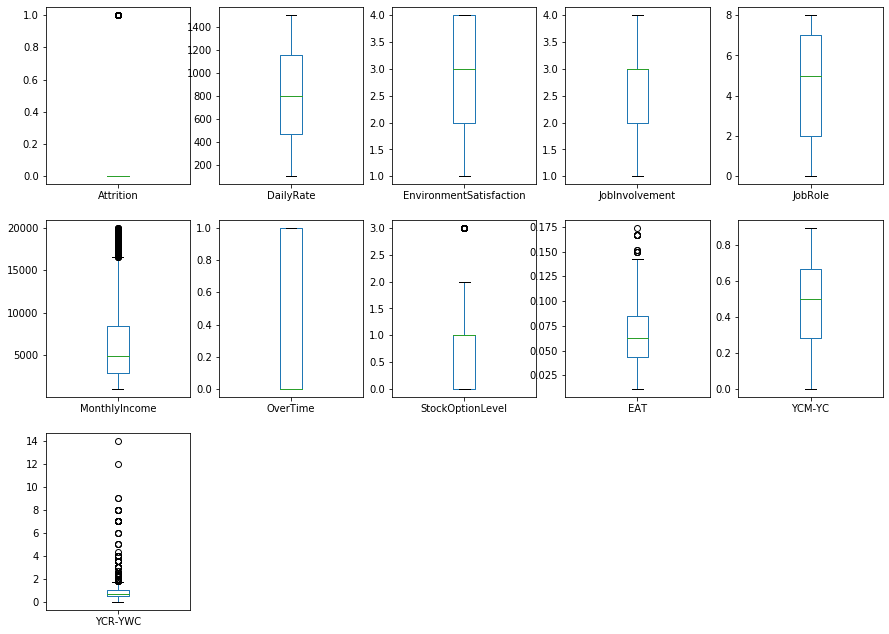

In [58]:
data.plot(kind = 'box', subplots = True, layout = (4,5), figsize = (15,15))

In [59]:
#There are outliers in the data. So, remove the outliers using zscore < 3
from scipy.stats import zscore
z_score = abs(zscore(data))
print(data.shape)
data = data.loc[(z_score<3).all(axis = 1)]
print(data.shape)

(1470, 11)
(1435, 11)


In [65]:
y = data['Attrition']
print('Shape of y is:',y.shape)

x = data.drop("Attrition", axis = 1)
print('Shape of x is:',x.shape)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4, random_state = 42)

LR = LogisticRegression()
LR.fit(x_train,y_train)
print('Score:',LR.score(x_train,y_train))
predval = LR.predict(x_test)

print('Accuracy_score:', accuracy_score(y_test, predval))

print('Confusion Matrix:','\n',confusion_matrix(y_test,predval))

print('Classification Report:','\n', classification_report(y_test,predval))

Shape of y is: (1435,)
Shape of x is: (1435, 10)
Score: 0.8397212543554007
Accuracy_score: 0.8414634146341463
Confusion Matrix: 
 [[482   0]
 [ 91   1]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       482
           1       1.00      0.01      0.02        92

    accuracy                           0.84       574
   macro avg       0.92      0.51      0.47       574
weighted avg       0.87      0.84      0.77       574



In [66]:
y = data['Attrition']
print('Shape of y:',y.shape)

x = data.drop("Attrition", axis = 1)
print('Shape of x:',x.shape)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
print('Score:',RFC.score(x_train,y_train))
predval = RFC.predict(x_test)

print('Accuracy_score:', accuracy_score(y_test, predval))

print('Confusion Matrix:','\n',confusion_matrix(y_test,predval))

print('Classification Report:','\n', classification_report(y_test,predval))

Shape of y: (1435,)
Shape of x: (1435, 10)
Score: 0.9770916334661355
Accuracy_score: 0.8538283062645011
Confusion Matrix: 
 [[351  14]
 [ 49  17]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       365
           1       0.55      0.26      0.35        66

    accuracy                           0.85       431
   macro avg       0.71      0.61      0.63       431
weighted avg       0.83      0.85      0.83       431



It can be observed that, RandomForestClassifier algorithm has better performace that LogisticRegression.